# Import Group Edges Dataset & Libraries

In [60]:
#Import Libraries
import pandas as pd
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Import Group Edge Dataset
df = pd.read_csv("group-edges.csv")

# Plot Network

The member graph has 456 nodes and 6692 edges.


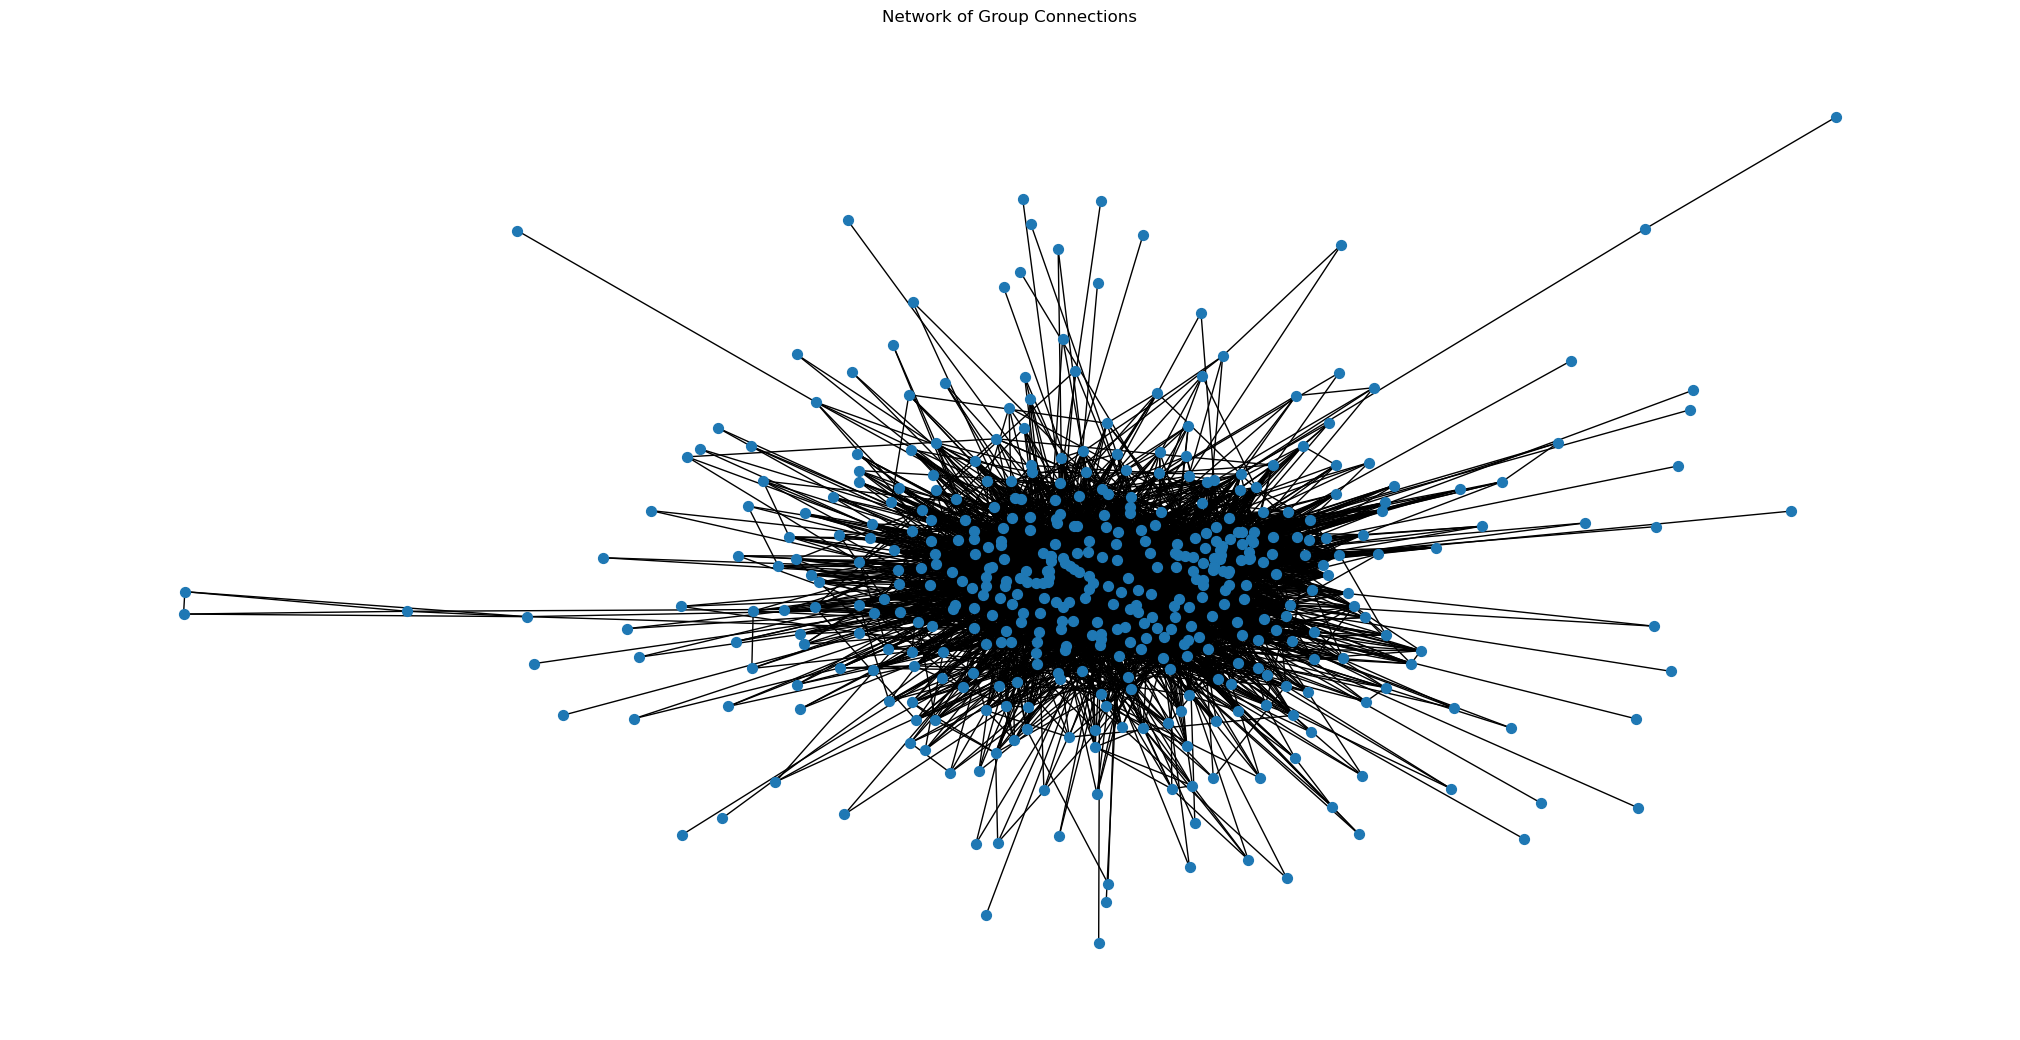

In [101]:
g = nx.from_pandas_edgelist(df, 
                            source='group1', 
                            target='group2', 
                            edge_attr='weight')

print('The member graph has {} nodes and {} edges.'.format(len(g.nodes),
                                                          len(g.edges)))
#The member graph has 456 nodes and 6692 edges

# Import Group Edge Dataset
df = pd.read_csv("C:\\Users\\Belma\\Downloads\\group-edges.csv")

g = nx.from_pandas_edgelist(df, 
                            source='group1', 
                            target='group2', 
                            edge_attr='weight')

# Plot the network
plt.figure(figsize=(20, 10))
nx.draw(g, with_labels=False, node_size=50)
plt.title('Network of Group Connections')
plt.show()

# Import Group Metadata

In [62]:
#Import group metadata
groups = pd.read_csv("C:\\Users\\Belma\\Downloads\\meta-groups.csv", index_col='group_id')
print('There are {} groups with metadata.'.format(groups.shape[0]))
#There are 603 groups 

# Print unique category values
unique_categories = groups['category_name'].unique()
print("Unique category values:", unique_categories)

There are 602 groups with metadata.
Unique category values: ['Outdoors & Adventure' 'Dancing' 'Sports & Recreation' 'Tech'
 'Socializing' 'Religion & Beliefs' 'Singles' 'Writing' 'Games'
 'Career & Business' 'Pets & Animals' 'Music' 'Food & Drink' 'LGBT'
 'New Age & Spirituality' 'Movements & Politics' 'Health & Wellbeing'
 'Education & Learning' 'Language & Ethnic Identity' 'Arts & Culture'
 'Cars & Motorcycles' 'Book Clubs' 'Photography' 'Community & Environment'
 'Hobbies & Crafts' 'Movies & Film' 'Fitness' 'Support' 'Sci-Fi & Fantasy'
 'Fashion & Beauty' 'Parents & Family']


# Centrality Measures Analysis

In [63]:
#Let's filter out the groups that are not present in the graph
groups = groups.loc[[x for x in g.nodes]]
print('After filtering, there are {} groups.'.format(groups.shape[0]))
groups.head()
#There are 456 groups

#Let's create some measures
groups['degree'] = pd.Series(dict(nx.degree(g)))
groups['betweeness'] = pd.Series(nx.betweenness_centrality(g))
groups['closeness'] = pd.Series(nx.closeness_centrality(g))
groups['eigenvector'] = pd.Series(nx.eigenvector_centrality(g))


After filtering, there are 456 groups.


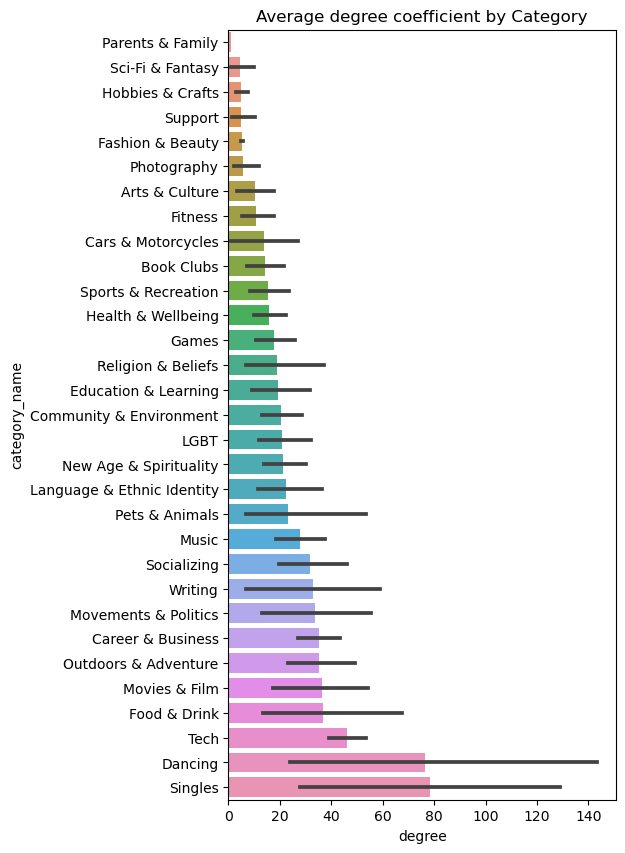

In [14]:
#Average Degree Coefficient 
fig, ax = plt.subplots(1,1, figsize=(5,10), dpi=100)

sns.barplot(data=groups, x='degree', y='category_name', 
            order=groups.groupby('category_name').degree.mean().sort_values().index)
ax.set_title('Average degree coefficient by Category')

plt.show()

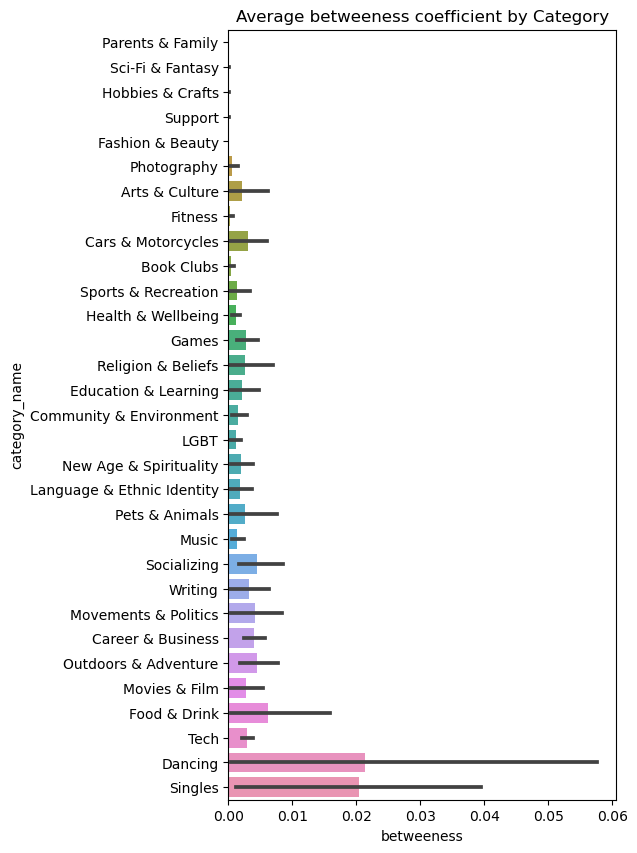

In [64]:
#Average Betweeness Coefficient 
fig, ax = plt.subplots(1,1, figsize=(5,10), dpi=100)

sns.barplot(data=groups, x='betweeness', y='category_name', 
            order=groups.groupby('category_name').degree.mean().sort_values().index)
ax.set_title('Average betweeness coefficient by Category')

plt.show()

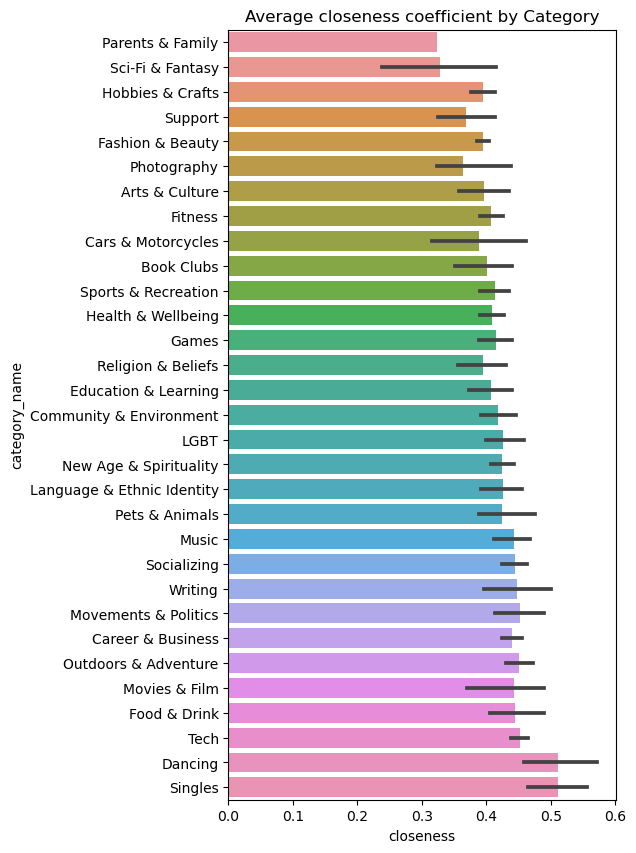

In [11]:
#Average Closeness Coefficient 
fig, ax = plt.subplots(1,1, figsize=(5,10), dpi=100)

sns.barplot(data=groups, x='Closeness', y='Category Name', 
            order=groups.groupby('category_name').degree.mean().sort_values().index)
ax.set_title('Average closeness coefficient by Category')

plt.show()

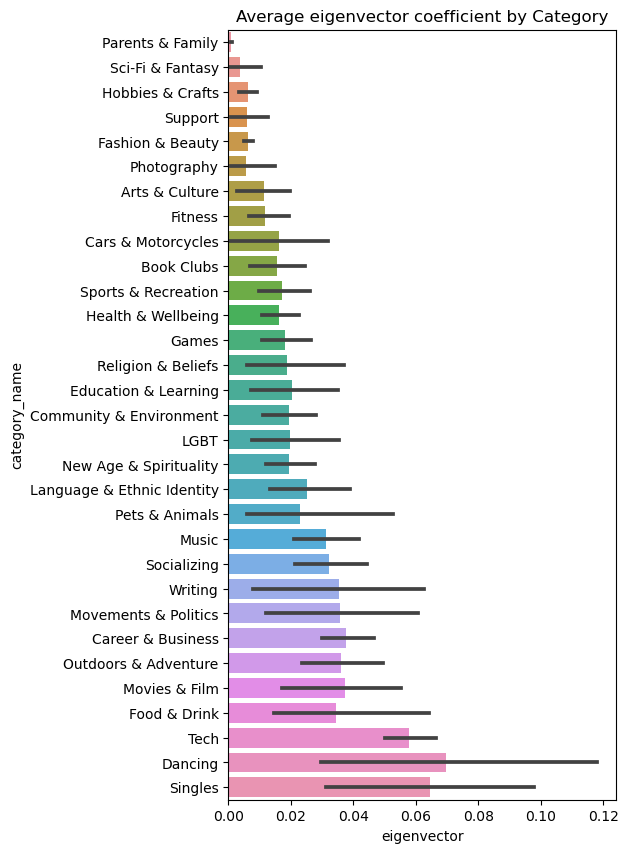

In [65]:
#Average Eigenvector Coefficient 
fig, ax = plt.subplots(1,1, figsize=(5,10), dpi=100)

sns.barplot(data=groups, x='eigenvector', y='category_name', 
            order=groups.groupby('category_name').degree.mean().sort_values().index)
ax.set_title('Average eigenvector coefficient by Category')

plt.show()

# Analysis of Centrality & Number of Members

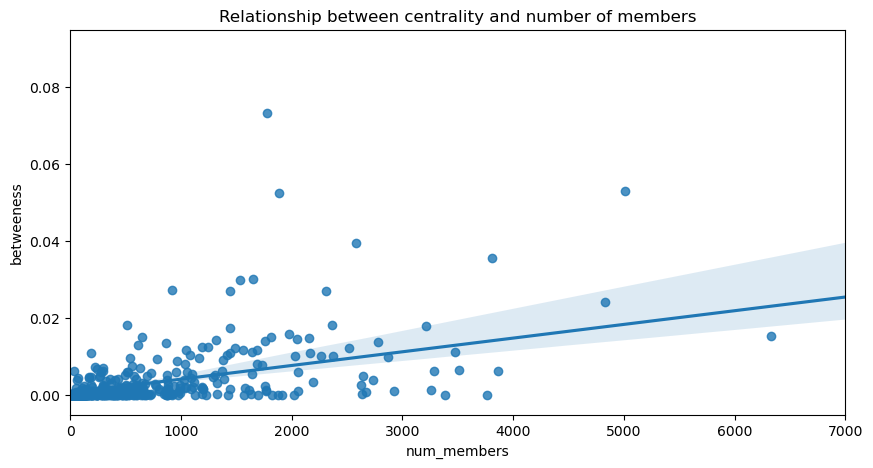

In [66]:
# Plot the Number of Members  vs. centrality
fig, ax = plt.subplots(1,1, figsize=(10,5))

sns.regplot(data=groups, x='num_members', y='betweeness')
ax.set_title('Relationship between centrality and number of members')
ax.set_xlim([0,7000])

plt.show()

# Top 10 most central groups

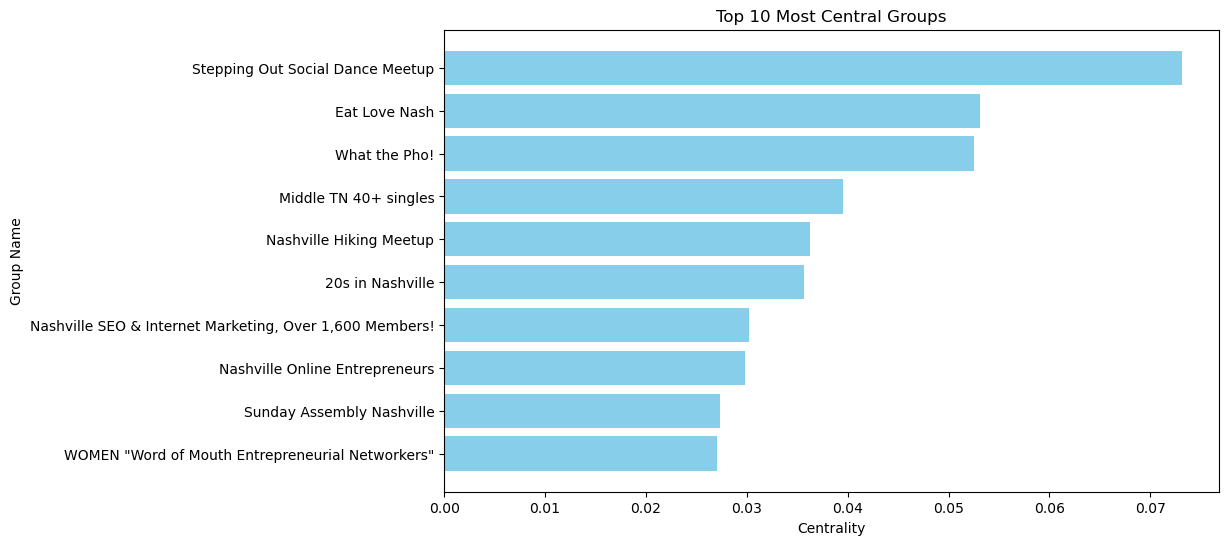

In [67]:
import matplotlib.pyplot as plt

# Sort groups by centrality in descending order and select the top 10
top_groups = groups.sort_values(by='betweeness', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_groups['group_name'], top_groups['betweeness'], color='skyblue')
plt.xlabel('Centrality')
plt.ylabel('Group Name')
plt.title('Top 10 Most Central Groups')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest centrality at the top
plt.show()

# Analysis of the network of Career and Business Category

The entire MeetUp group graph has 456 nodes and 6692 edges.
There are 71 Career groups with metadata.
After trimming, there are 69 groups with metadata.
These include...
group_id
8908602     Nashville Network After Work - Business Networ...
20124638                    Social Entrepreneurs of Nashville
18414590                          Women 'n' Wine of Nashville
18414491                         Women'n'Wine of Murfreesboro
1498076     Christian Business Leaders Roundtable | CEO Fe...


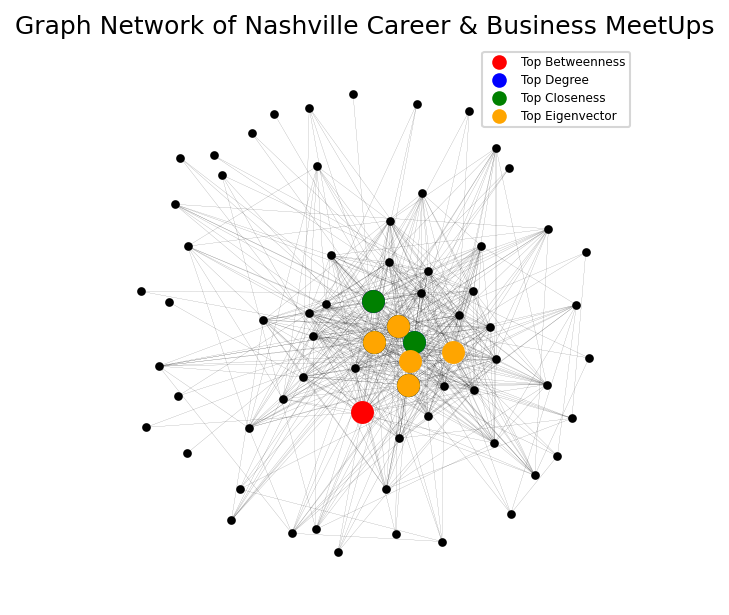

In [68]:
#FOCUS ANALYSIS ON CAREER & BUSINESS GROUPS 
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

g0 = nx.from_pandas_edgelist(df, 
                            source='group1', 
                            target='group2', 
                            edge_attr='weight')

print('The entire MeetUp group graph has {} nodes and {} edges.'.format(
    len(g0.nodes),
    len(g0.edges)))

career = groups.loc[groups.category_name == 'Career & Business']
print('There are {} Career groups with metadata.'.format(career.shape[0]))

# Let's trim the graph down to the largest connected Career & Business network
gt = g0.subgraph(career.index)
g = [gt.subgraph(c) for c in nx.connected_components(gt)][0]
career = career.loc[(n for n in g.nodes)]
print('After trimming, there are {} groups with metadata.\nThese include...'.format(career.shape[0]))
print(career.sample(5).group_name.to_string())

plt.figure(dpi=150)


# Calculate node centrality measures
betweenness_centrality = nx.betweenness_centrality(g)
degree_centrality = nx.degree_centrality(g)
closeness_centrality = nx.closeness_centrality(g)
eigenvector_centrality = nx.eigenvector_centrality(g)

# Identify the top 5 most influential nodes for each centrality measure
top_betweenness_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:5]
top_degree_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]
top_closeness_nodes = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:5]
top_eigenvector_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:5]

# Draw the network with smaller nodes for all other nodes
pos = nx.spring_layout(g, k=2)
nx.draw_networkx_nodes(g, pos, nodelist=[node for node in g.nodes() if node not in top_betweenness_nodes 
                                         and node not in top_degree_nodes 
                                         and node not in top_closeness_nodes 
                                         and node not in top_eigenvector_nodes], 
                       node_size=10, node_color='black')

# Draw the network with larger node size for the top 5 nodes for each centrality measure
nx.draw_networkx_nodes(g, pos, nodelist=top_betweenness_nodes, node_size=100, node_color='red', label='Top Betweenness')
nx.draw_networkx_nodes(g, pos, nodelist=top_degree_nodes, node_size=100, node_color='blue', label='Top Degree')
nx.draw_networkx_nodes(g, pos, nodelist=top_closeness_nodes, node_size=100, node_color='green', label='Top Closeness')
nx.draw_networkx_nodes(g, pos, nodelist=top_eigenvector_nodes, node_size=100, node_color='orange', label='Top Eigenvector')
nx.draw_networkx_edges(g, pos, width=0.05)

# Add legend in the top right corner
plt.legend(loc='upper right', fontsize='xx-small', markerscale=0.6)

ax = plt.gca()
ax.set_aspect(1)
ax.axis('off')
ax.set_title('Graph Network of Nashville Career & Business MeetUps')
plt.show()

# Top 10 Career Groups

There are 71 Career groups with metadata.


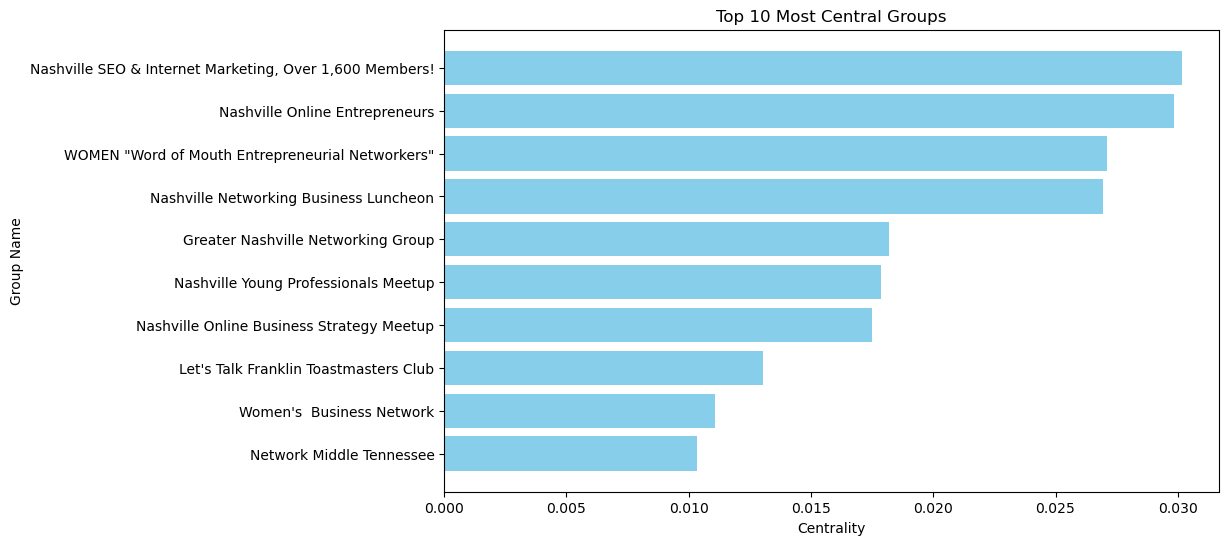

In [69]:
import matplotlib.pyplot as plt

career = groups.loc[groups.category_name == 'Career & Business']
print('There are {} Career groups with metadata.'.format(career.shape[0]))
# Sort groups by centrality in descending order and select the top 10

top_groups_career = career.sort_values(by='betweeness', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_groups_career['group_name'], top_groups_career['betweeness'], color='skyblue')
plt.xlabel('Centrality')
plt.ylabel('Group Name')
plt.title('Top 10 Most Central Groups')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest centrality at the top
plt.show()


We need to analyze Nashville SEO & Internet Marketing further



There are 0 Events for these groups

In [76]:
import pandas as pd
import numpy as np

# Read in metadata
members = pd.read_csv('meta-members.csv', index_col='member_id')
groups = pd.read_csv('meta-groups.csv', index_col='group_id')
events = pd.read_csv('meta-events.csv', index_col='event_id')

# Read in edge data
rsvps = pd.read_csv('rsvps.csv')

# What is the event that occurred the most and what is the network of members and events

Find the group that has the most events

In [77]:
# Find the most frequent event name
most_common_event = events['group_id'].value_counts().idxmax()

# Find the group name associated with the most frequent event
most_common_group_name = groups.loc[most_common_event, 'group_name']

print("The group that has the most event is:", most_common_event)
print("The group that has the most events is:", most_common_group_name)

The group that has the most event is: 339011
The group that has the most events is: Nashville Hiking Meetup


Find the number of events and members for this group

In [99]:
# Get Hiking Events
reiki_event_ids = events.loc[events.group_id == 339011].index.tolist()

# Get list of unique member_ids attending a Nashville Hiking Event 
reiki_rsvps = rsvps.loc[rsvps.event_id.isin(reiki_event_ids)]
reiki_member_ids = reiki_rsvps['member_id'].unique().tolist()

print('There are {} Nashville Hiking Meetup'.format(len(reiki_event_ids)))
print('There are {} Nashville Hiking Meetup'.format(len(reiki_member_ids)))

There are 200 Nashville Hiking Meetup
There are 878 Nashville Hiking Meetup


Create the Network

In [100]:
import networkx as nx

# Assuming reiki_rsvps is your pandas DataFrame containing edge data
g = nx.from_pandas_edgelist(reiki_rsvps,
                             source='member_id',
                             target='event_id')

# Add "Node Type" attribute 
node_type_dict = {n: ('member' if n in reiki_member_ids else 'event') 
                        for n in g.nodes}
nx.set_node_attributes(g, node_type_dict, 'node_type')

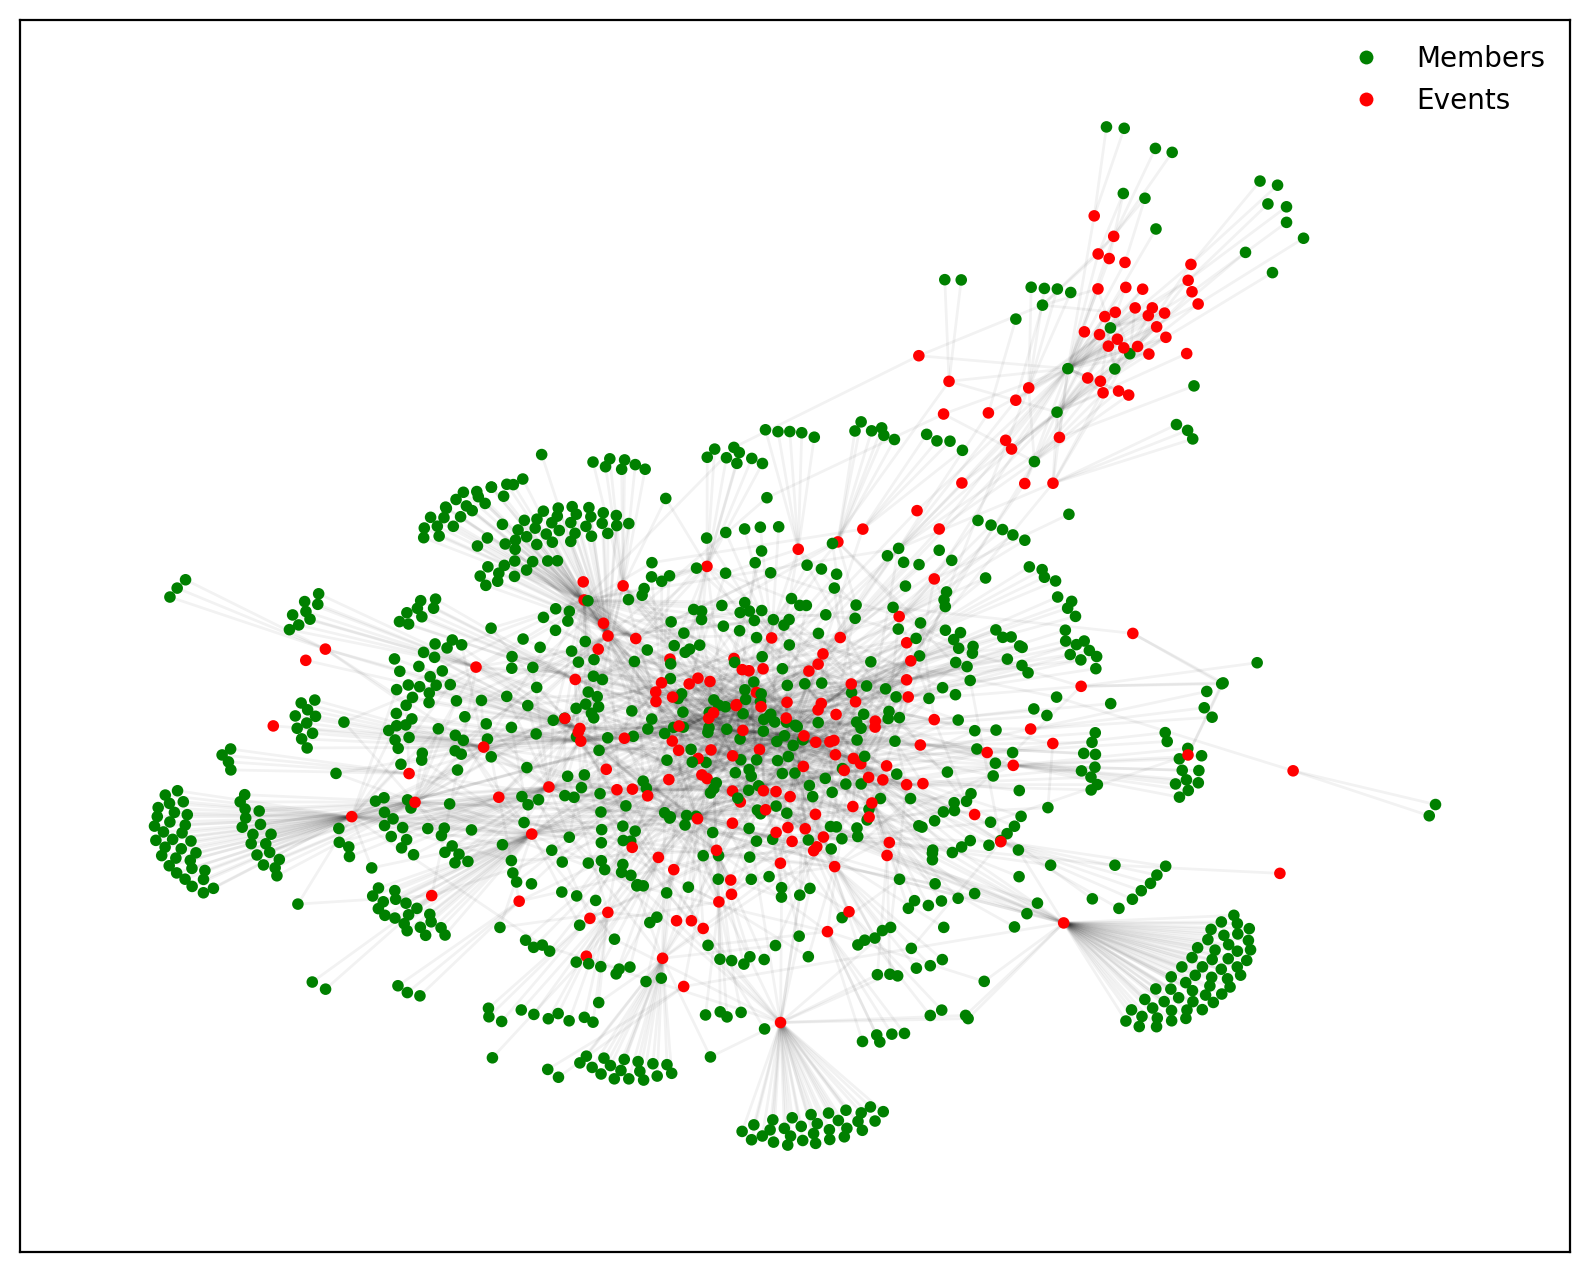

In [75]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming g is your NetworkX graph
fig, ax = plt.subplots(figsize=(10, 8), dpi=200)

pos = nx.spring_layout(g)
colors = ['g' if g.nodes[n]['node_type'] == 'member' else 'r' for n in g.nodes]
nx.draw_networkx_nodes(g, pos, node_color=colors, node_size=10)
nx.draw_networkx_edges(g, pos, alpha=0.05)

# Draw a legend
handles = [plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="g"), 
           plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="r")]
plt.legend(handles, ['Members', 'Events'], frameon=False)

plt.show()